# Ekstrakcja cech

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
from sklearn.datasets import load_iris

data = load_iris()

X = data['data']
y = data['target']

X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

## Analiza składowych głównych

W pierwszym kroku zobaczymy, w jaki sposób analiza składowych głównych (PCA) może posłużyć do redukcji wymiarowości zbioru danych. W metodzie PCA jest bardzo istotne, aby atrybuty redukowanego zbioru były porównywalne, więc konieczna jest normalizacja atrybutów. My posłużymy się standaryzacją.

In [3]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit(X).transform(X)

X_scaled[:5], y[:5]

(array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
        [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
        [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
        [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
        [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]]),
 array([0, 0, 0, 0, 0]))

Jako pierwszy przykład dokonamy redukcji zbioru danych z 4 wymiarów do 2 wymiarów. Kryterium, jakie maksymalizuje PCA, jest wariancja nowych wymiarów.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit(X).transform(X)
X_pca[:5], y[:5]

(array([[-2.68412563,  0.31939725],
        [-2.71414169, -0.17700123],
        [-2.88899057, -0.14494943],
        [-2.74534286, -0.31829898],
        [-2.72871654,  0.32675451]]),
 array([0, 0, 0, 0, 0]))

Spójrzmy, jak wygląda zbiór danych po redukcji i jak można zinterpretować nowe wymiary.

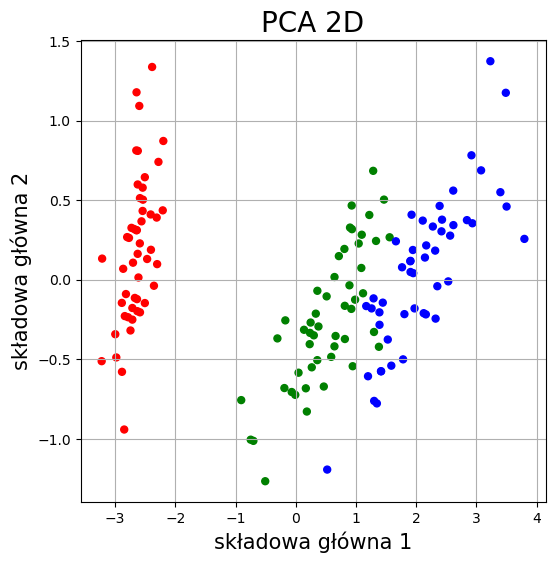

In [5]:
colrs = np.array(['red', 'green', 'blue'])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('PCA 2D', fontsize=20)
ax.set_xlabel('składowa główna 1', fontsize=15)
ax.set_ylabel('składowa główna 2', fontsize=15)
ax.grid()

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=colrs[y], s=25)

In [6]:
for i,v in enumerate(pca.explained_variance_ratio_):
    print(f'Wariancja tłumaczona przez składową {i+1}: {v:.4f}')

Wariancja tłumaczona przez składową 1: 0.9246
Wariancja tłumaczona przez składową 2: 0.0531


In [7]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Przykładowo, pierwsza z nowych współrzędnych jest wyliczana według wzoru:

`pca_1 = 0.36 * 'sepal length (cm)' - 0.08 * 'sepal width (cm)' + 0.86 * 'petal length (cm)' + 0.36 * 'petal width (cm)'`

Skoro pierwsza składowa tak dobrze tłumaczy wariancję, być może da się ten zbiór danych skompresować nawet bardziej?

In [8]:
pca = PCA(n_components=1)

X_pca = pca.fit(X).transform(X)
X_pca[:5], y[:5]

(array([[-2.68412563],
        [-2.71414169],
        [-2.88899057],
        [-2.74534286],
        [-2.72871654]]),
 array([0, 0, 0, 0, 0]))

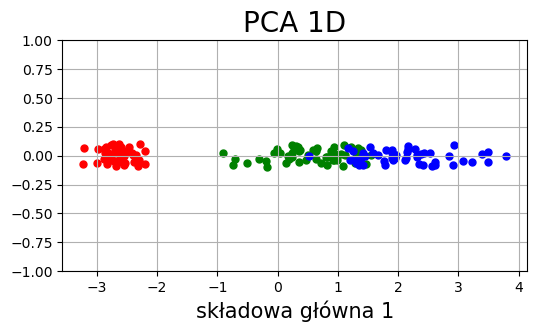

In [9]:
colrs = np.array(['red', 'green', 'blue'])

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('PCA 1D', fontsize=20)
ax.set_xlabel('składowa główna 1', fontsize=15)
ax.set_ylim(-1., 1.)
ax.grid()

for c in np.unique(y):
    idx = y == c
    vals = X_pca[idx, 0]
    ax.scatter(vals, np.zeros_like(vals) + np.random.uniform(-0.1,
                                                             0.1, len(vals)), s=25, color=colrs[c])

## Samoorganizujące się mapy

Poniższy kod pokazuje użycie SOM-ów (zwanych też mapami Kohonena) do redukcji wymiarowości problemu przez nienadzorowane uczenie sieci neuronowej. Posłużymy się do tego celu zbiorem `Iris` który oryginalnie posiada cztery wymiary.

Przed wykonaniem ćwiczenia zainstaluj potrzebny pakiet wywołując polecenie

```bash
bash$ pip install minisom
```

lub uruchamiając polecenie bezpośrednio w komórce notatnika:

```
!pip install minisom
```

In [ ]:
from minisom import MiniSom

som_size = (5,5)
som = MiniSom(som_size[0], som_size[1], 4, sigma=0.3, learning_rate=0.5)

Wagi sieci neuronowej mogą być inicjalizowane na dwa sposoby:

- losowo (`random_weights_init()`
- przy użyciu metody składowych głównych (`pca_weights_init`)

Sam proces trenowania sieci może się także odbywać na dwa sposoby:

- losowo (`train_random()`)
- przy użyciu mini-batchy (`train_batch()`)

In [ ]:
som.random_weights_init(X)
som.train_random(X, 10000, verbose=True)

# som.pca_weights_init(X)
# som.train_batch(X, 10000, verbose=True) 

Pierwsza wizualizacja pokazuje odległości między poszczególnymi neuronami

In [ ]:
plt.figure(figsize=(8, 7))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']

for cnt, xx in enumerate(X):
    w = som.winner(xx)
    plt.plot(w[0]+.5, w[1]+.5, markers[y[cnt]], markerfacecolor='None',
             markeredgecolor=colors[y[cnt]], markersize=12, markeredgewidth=2)

plt.axis([0, som_size[0], 0, som_size[1]])
plt.show()

Druga wizualizacja pokazuje częstotliwość aktywacji poszczególnych neuronów

In [ ]:
plt.figure(figsize=(8, 7))
frequencies = np.zeros(som_size)

for position, values in som.win_map(X).items():
    frequencies[position[0], position[1]] = len(values)

plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()

Ostatnia wizualizacja wyświetla stopień jednorodności poszczególnych neuronów

In [ ]:
labels_map = som.labels_map(X, y)
label_names = np.unique(y)

plt.figure(figsize=(8, 7))
the_grid = GridSpec(5, 5)

for position in labels_map.keys():

    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[2-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, data.target_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()

Przypisanie każdego obiektu do konkretnego neuronu na samoorganizującej się mapie

In [ ]:
for x in X:
    print(f'{x}: {som.winner(x)}')